<a href="https://colab.research.google.com/github/nmermigas/GCDB/blob/main/CalendAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# # For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
# try:
#     import torch
#     import torchvision
#     assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
#     assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
#     print(f"torch version: {torch.__version__}")
#     print(f"torchvision version: {torchvision.__version__}")
# except:
#     print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
#     !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
#     import torch
#     import torchvision
#     print(f"torch version: {torch.__version__}")
#     print(f"torchvision version: {torchvision.__version__}")

In [88]:
import requests
import zipfile
from pathlib import Path

data_path=Path('data/')
gcdb_path = data_path / 'gcdb'

if gcdb_path.is_dir():
  print(f'{gcdb_path} directory exists')
else:
  print(f"Did not find {gcdb_path} directory, creating one...")
  gcdb_path.mkdir(parents=True, exist_ok=True)

  # Download pizza, steak, sushi data
  with open(data_path / "gcdb.zip", "wb") as f:
      request = requests.get("https://github.com/nmermigas/GCDB/raw/main/gcdb.zip")
      print("Downloading gcdb data...")
      f.write(request.content)
  # Unzip pizza, steak, sushi data
  with zipfile.ZipFile(data_path / "gcdb.zip", "r") as zip_ref:
      print("Unzipping gcdb data...")
      zip_ref.extractall(gcdb_path)


Did not find data/gcdb directory, creating one...
Unzipping gcdb data...


In [83]:
print(data_path / "gcdb.zip")
print(gcdb_path / "gcdb.zip")


data/gcdb.zip
data/gcdb/gcdb.zip


In [ ]:
!pip install kaggle


In [78]:
!chmod 600 kaggle/kaggle.json

In [77]:
!kaggle datasets download -d nmermigas/handwritten-greek-characters-from-gcdb

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


data  drive  kaggle  sample_data


In [44]:
import matplotlib.pyplot as plt
import torch
import torchvision
import copy

from torch import nn
from torchvision import datasets,transforms
from pathlib import Path

device = "cuda" if torch.cuda.is_available() else "cpu"
device

data_dir = Path('data')

# emnist_train_transforms = transforms.Compose([
#     transforms.ToTensor(),  # Convert image to tensor
#     transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values to [-1, 1]
# ])

# Get EMNIST training data
emnist_data = datasets.EMNIST(root=data_dir,
                                       split='letters',
                                       train= True,
                                       download = True)

# emnist_test_data = datasets.EMNIST(root=data_dir,
#                                    split='balanced',
#                                    train=False,
#                                    download=True)


In [45]:
print(f'Data size: {emnist_data.data.shape}')

images = emnist_data.data.view([emnist_data.data.shape[0],1,emnist_data.data.shape[1],emnist_data.data.shape[2]]).float()

print(f'Tensor data: {images.shape}')

Data size: torch.Size([124800, 28, 28])
Tensor data: torch.Size([124800, 1, 28, 28])


In [46]:
emnist_data.class_to_idx

{'N/A': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [47]:
letterCategories = emnist_data.classes[1:]
labels = copy.deepcopy(emnist_data.targets)-1
print(labels.shape)

torch.Size([124800])


In [48]:
labels.unique()

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25])

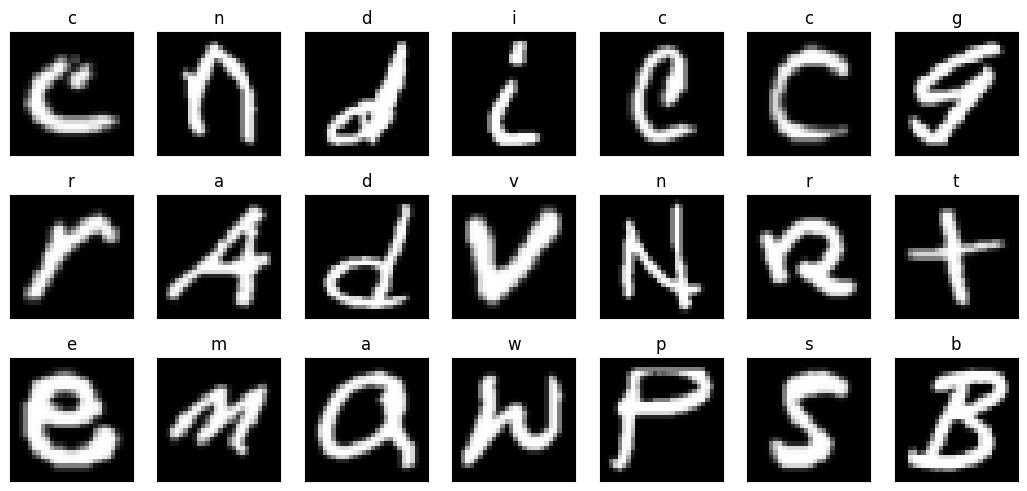

In [50]:
# visualize

fig, axs = plt.subplots(3,7, figsize=(13,6))

for i, ax in enumerate(axs.flatten()):
  pic = np.random.randint(images.shape[0])

  image = np.squeeze(images[pic,:,:])
  letter = letterCategories[labels[pic]]

  ax.imshow(image.T,cmap='gray')
  ax.set_title(f"{letter}")
  ax.set_xticks([])
  ax.set_yticks([])
plt.show()

### Create train/test sets

In [52]:
import os
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

num_workers = os.cpu_count()
print(num_workers)

train_data, test_data, train_labels, test_labels = train_test_split(images, labels, test_size=.1)

train_data = TensorDataset(train_data,train_labels)
train_data = TensorDataset(test_data,test_labels)

batch_size = 32
train_dataloader = DataLoader(train_data,
                              batch_size=batch_size,
                              shuffle=True,
                              num_workers=num_workers,
                              pin_memory=True)
test_dataloader = DataLoader(test_data,
                              batch_size=batch_size,
                              shuffle=False,
                              num_workers=num_workers,
                              pin_memory=True)


2


In [56]:
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7cce096f5930>,
 <torch.utils.data.dataloader.DataLoader at 0x7cce096f5900>)

In [58]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 1, 28, 28]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


In [62]:
print(train_dataloader.dataset.tensors[0].shape)
print(train_dataloader.dataset.tensors[1].shape)


torch.Size([12480, 1, 28, 28])
torch.Size([12480])
